In [2]:
# !pip install tensorflow-gpu
!pip install gdown

  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
import joblib

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [4]:
!gdown --id 1aRXGcJlIkuC6uj1iLqzi9DQQS-3GPwM_ --output airbnb_nyc.csv

C:\Users\msi\anaconda3\envs\Shayekh_20230126\lib\site-packages\gdown\cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1aRXGcJlIkuC6uj1iLqzi9DQQS-3GPwM_
To: C:\Users\msi\Desktop\TestProject\Deploy-Keras-Deep-Learning-Model-with-Flask\price_prediction\airbnb_nyc.csv

  0%|          | 0.00/7.08M [00:00<?, ?B/s]
  7%|7         | 524k/7.08M [00:00<00:02, 2.54MB/s]
 15%|#4        | 1.05M/7.08M [00:00<00:02, 2.97MB/s]
 22%|##2       | 1.57M/7.08M [00:00<00:01, 3.50MB/s]
 30%|##9       | 2.10M/7.08M [00:00<00:01, 3.95MB/s]
 44%|####4     | 3.15M/7.08M [00:00<00:00, 4.86MB/s]
 59%|#####9    | 4.19M/7.08M [00:00<00:00, 5.41MB/s]
 74%|#######4  | 5.24M/7.08M [00:01<00:00, 5.96MB/s]
 89%|########8 | 6.29M/7.08M [00:01<00:00, 6.16MB/s]
100%|##########| 7.08M/7.08M [00:01<00:00, 6.09MB/s]
100%|##########| 7.08M/7.08M [00:01<00:00

In [5]:
df = pd.read_csv('airbnb_nyc.csv')

# Exploration

In [6]:
df.shape

(48895, 16)

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

C:\Users\msi\AppData\Local\Temp\ipykernel_1456\689887770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price);


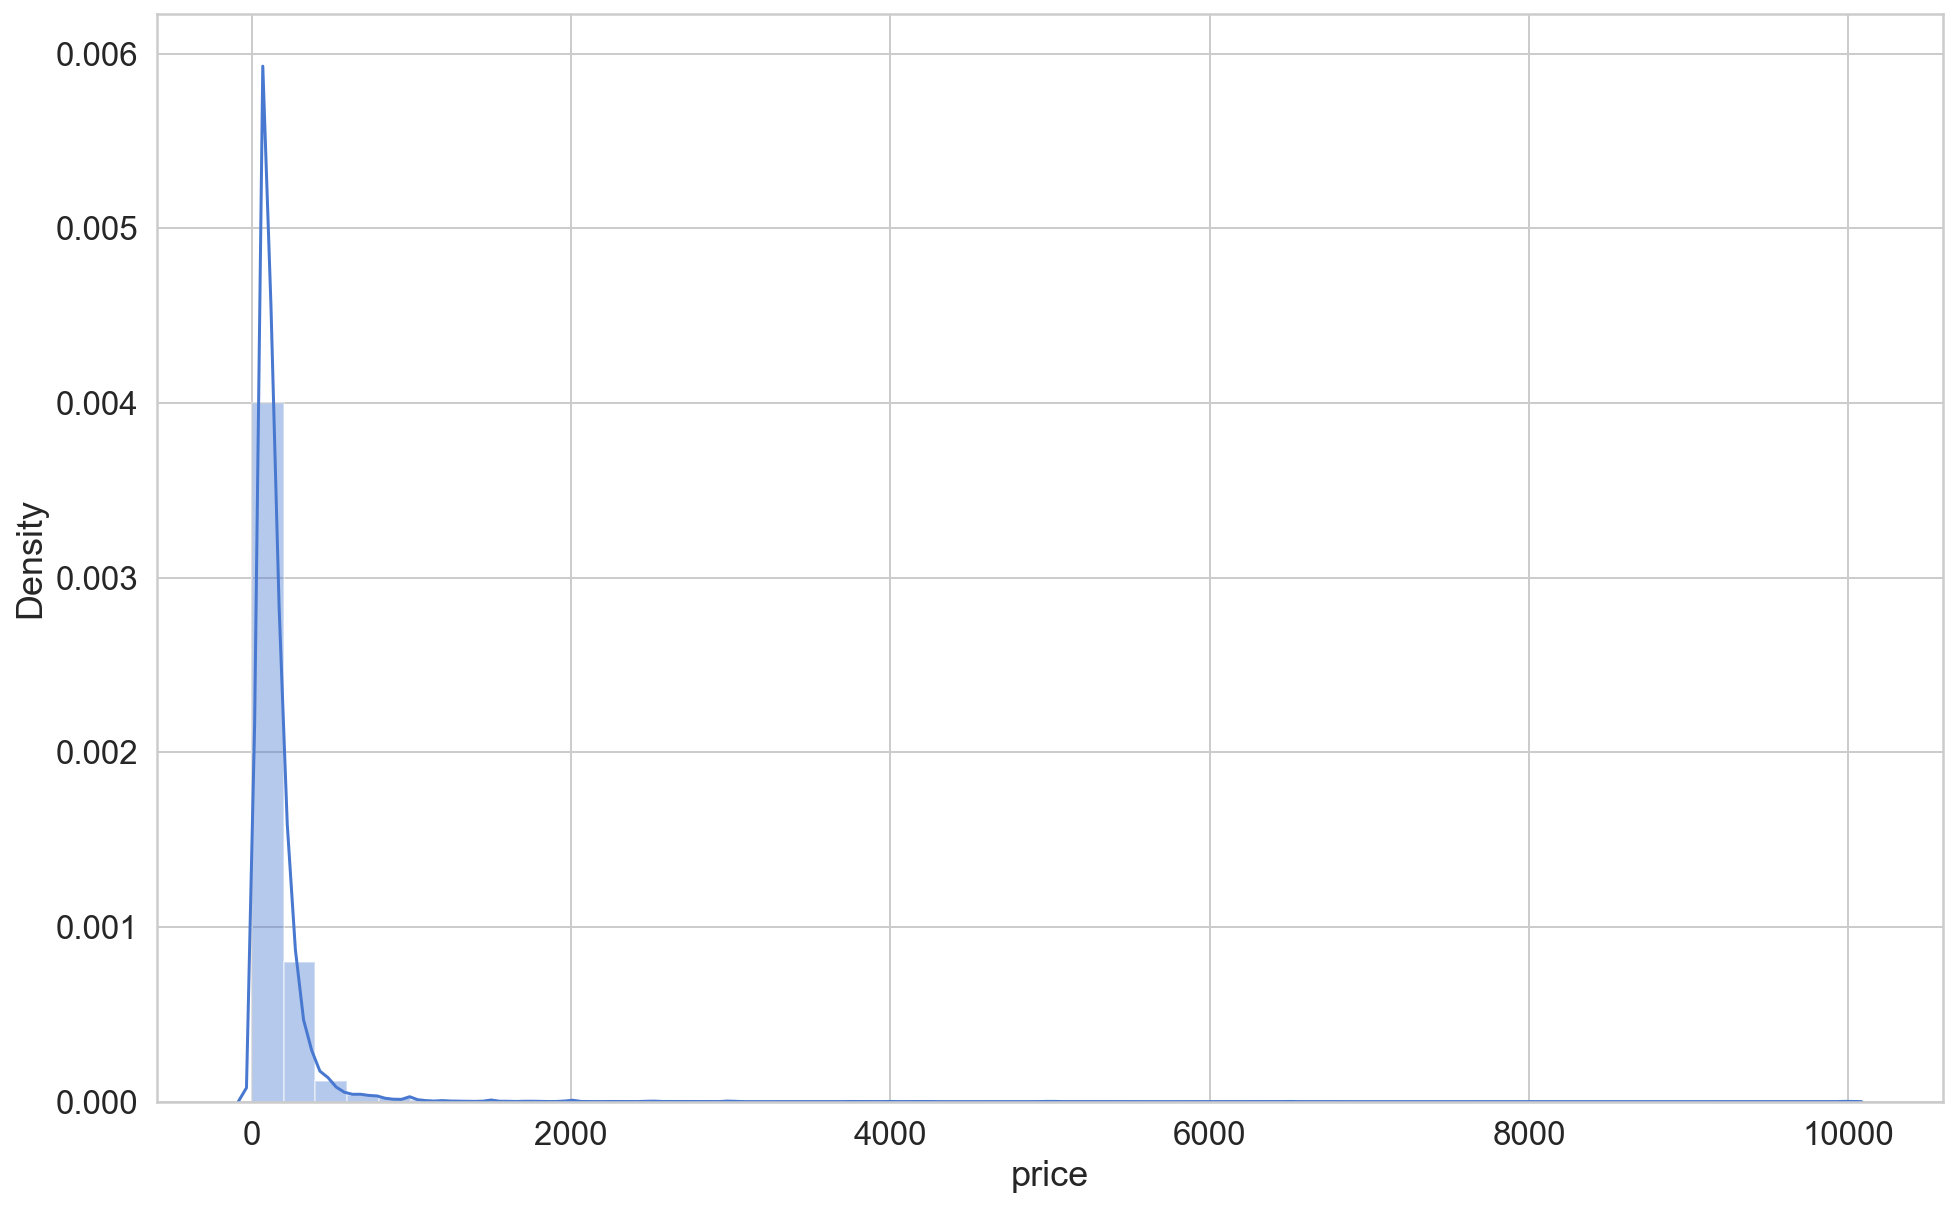

In [8]:
sns.distplot(df.price);

C:\Users\msi\AppData\Local\Temp\ipykernel_1456\4159789517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df.price));


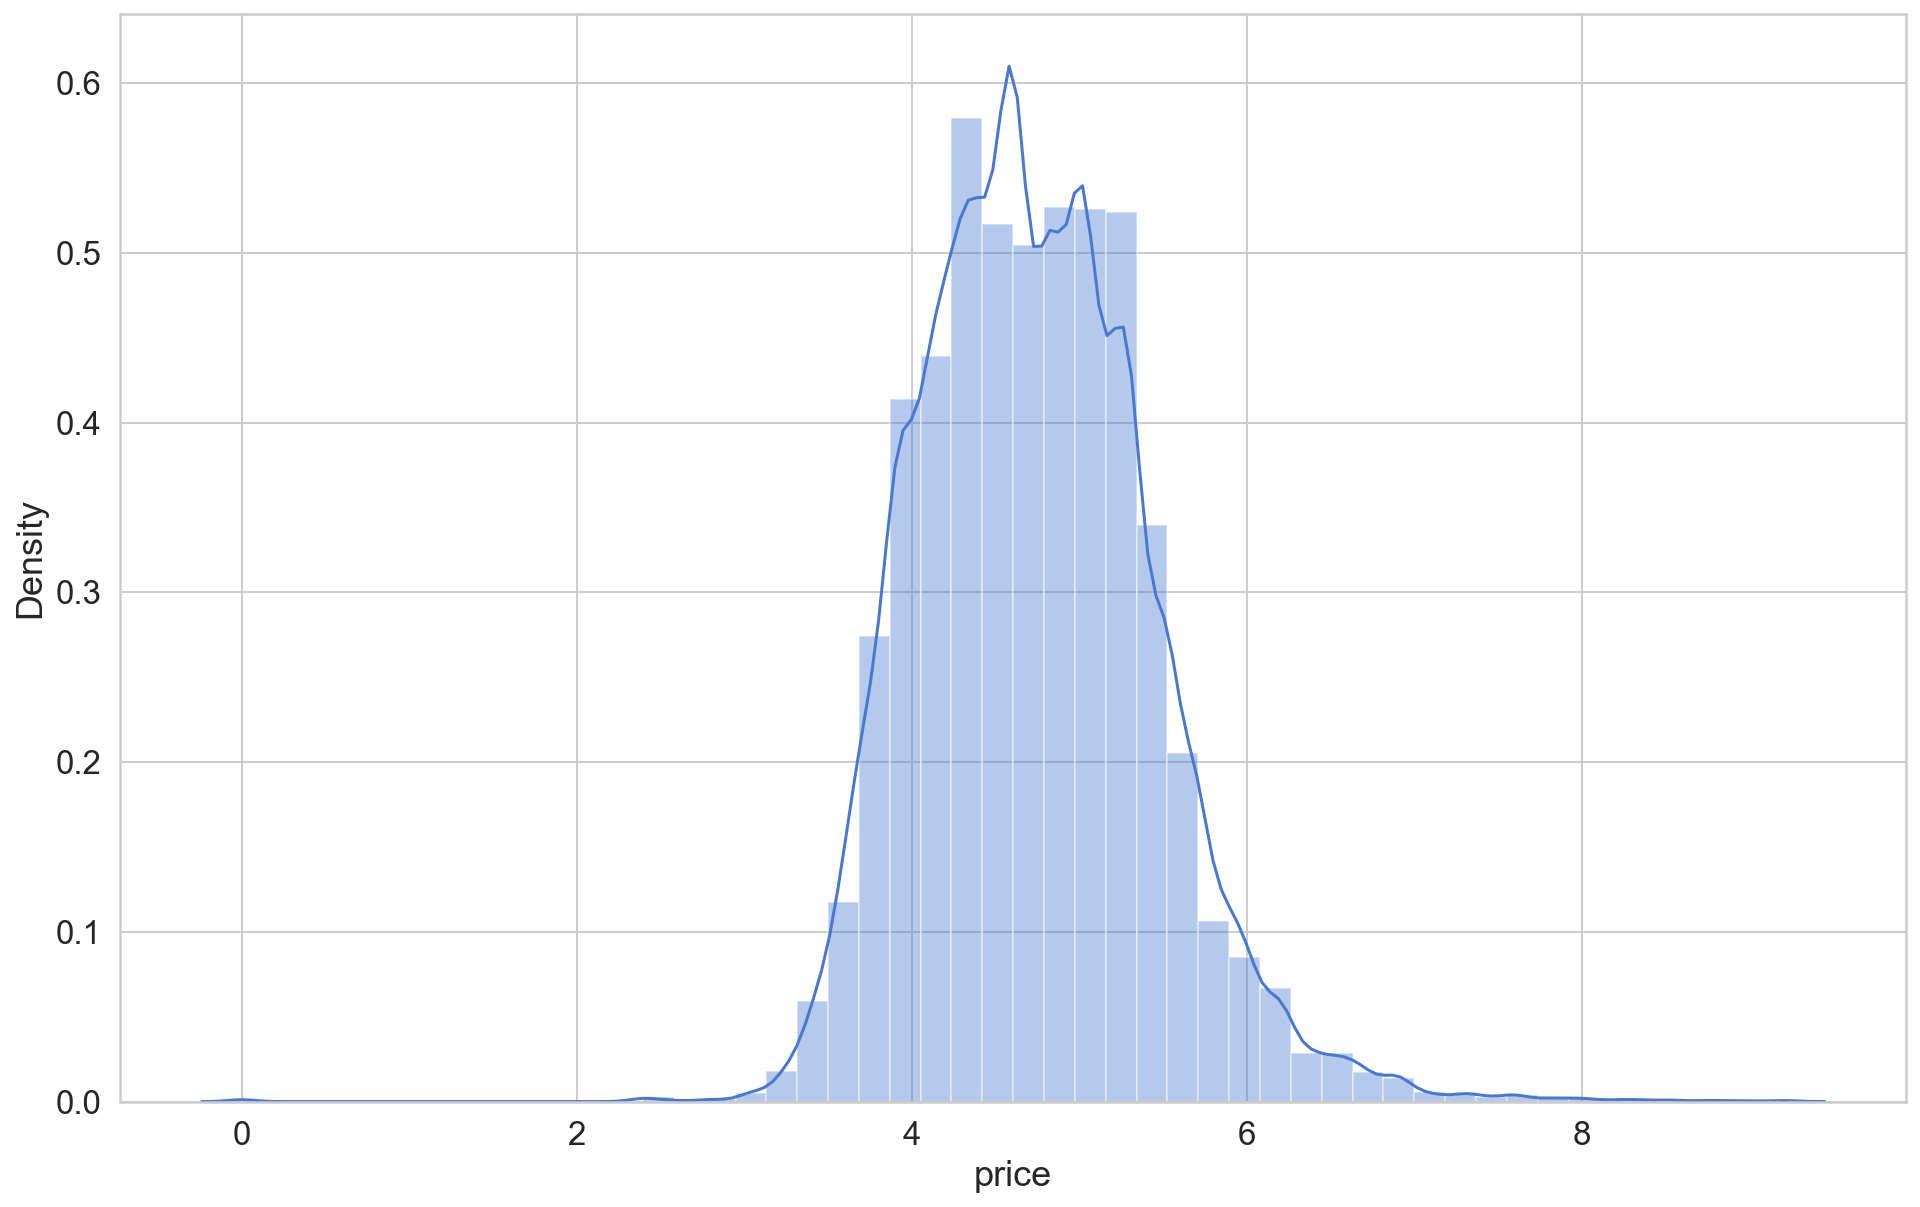

In [9]:
sns.distplot(np.log1p(df.price));

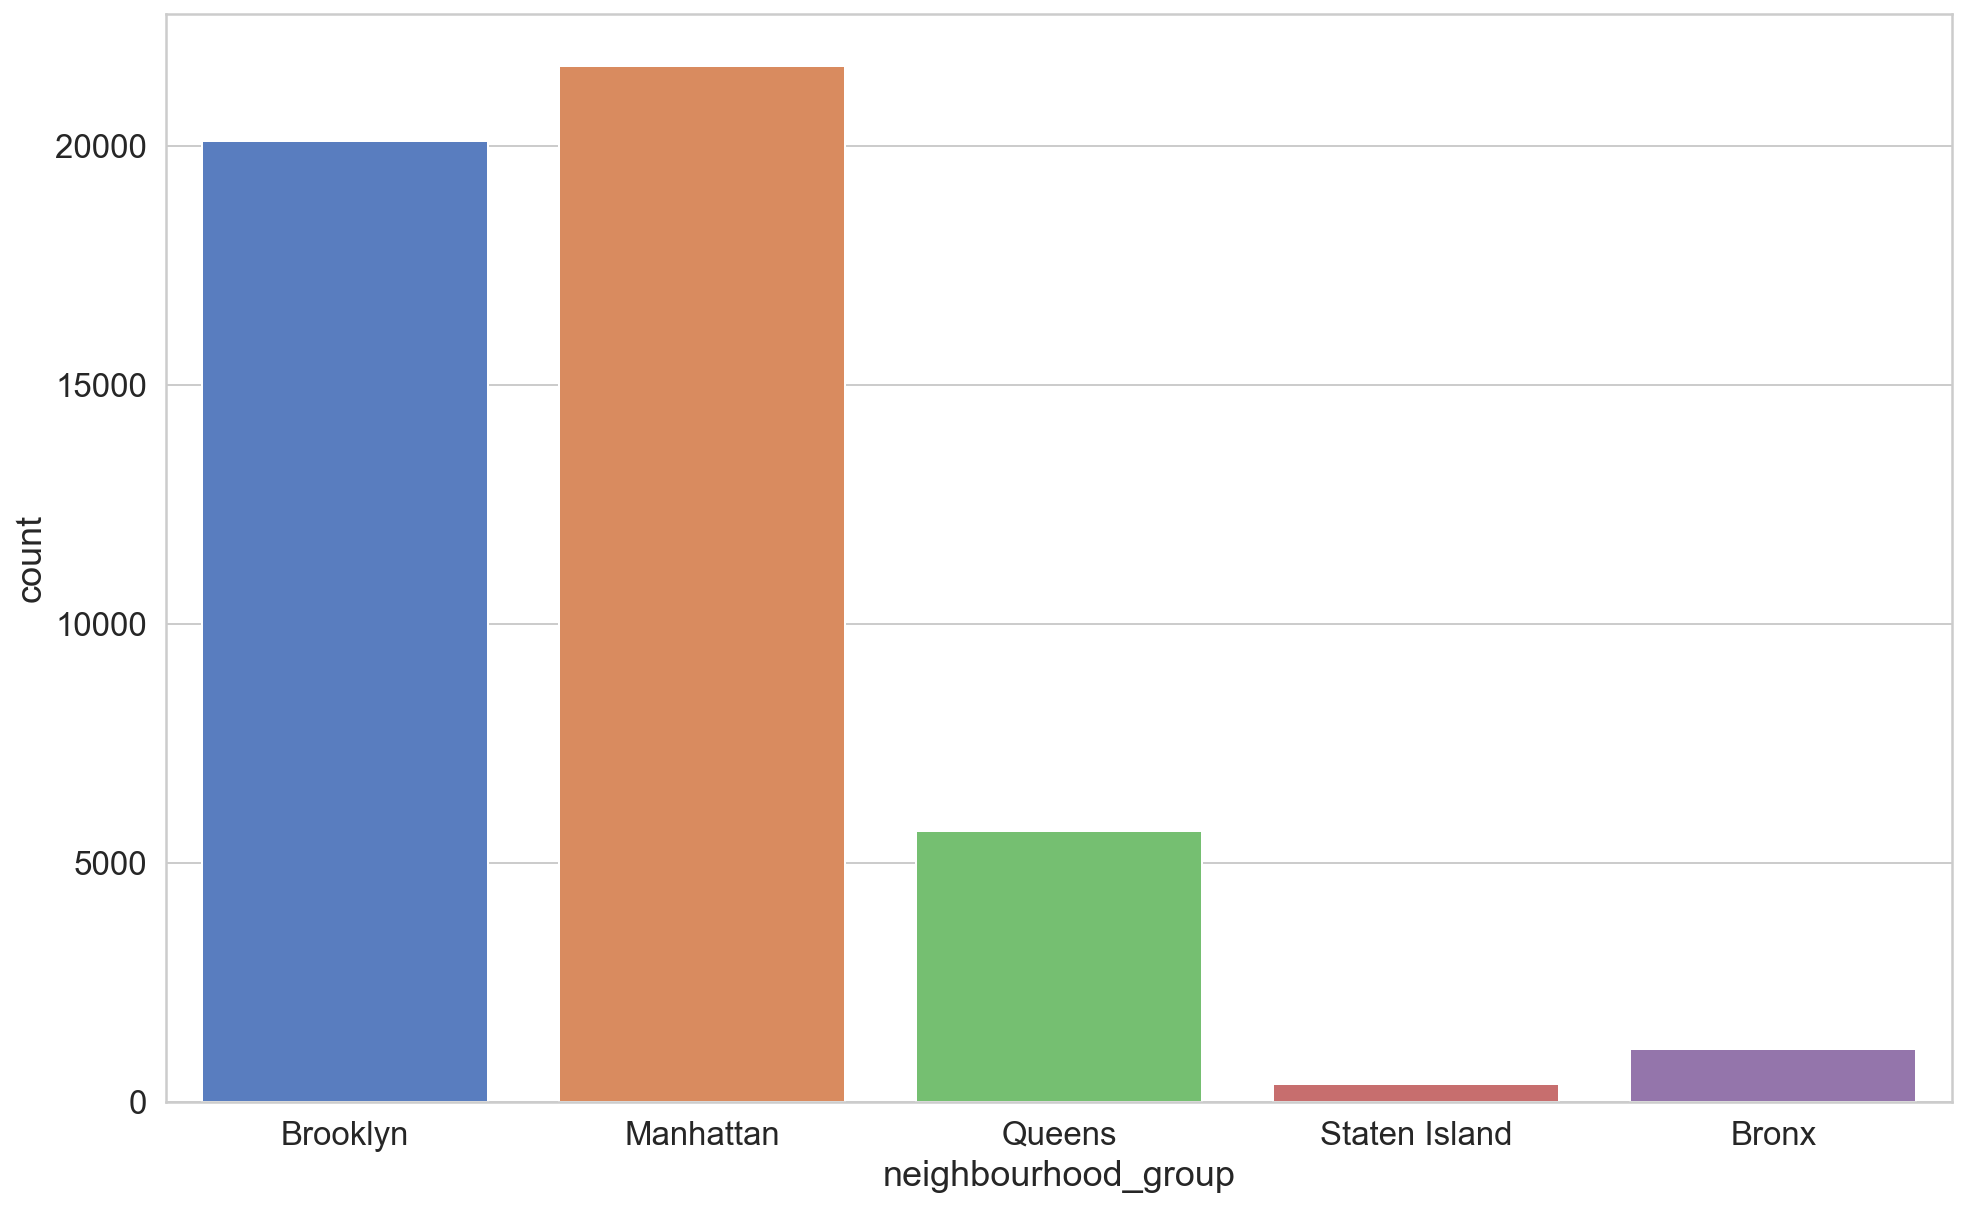

In [10]:
sns.countplot(x='neighbourhood_group', data=df);

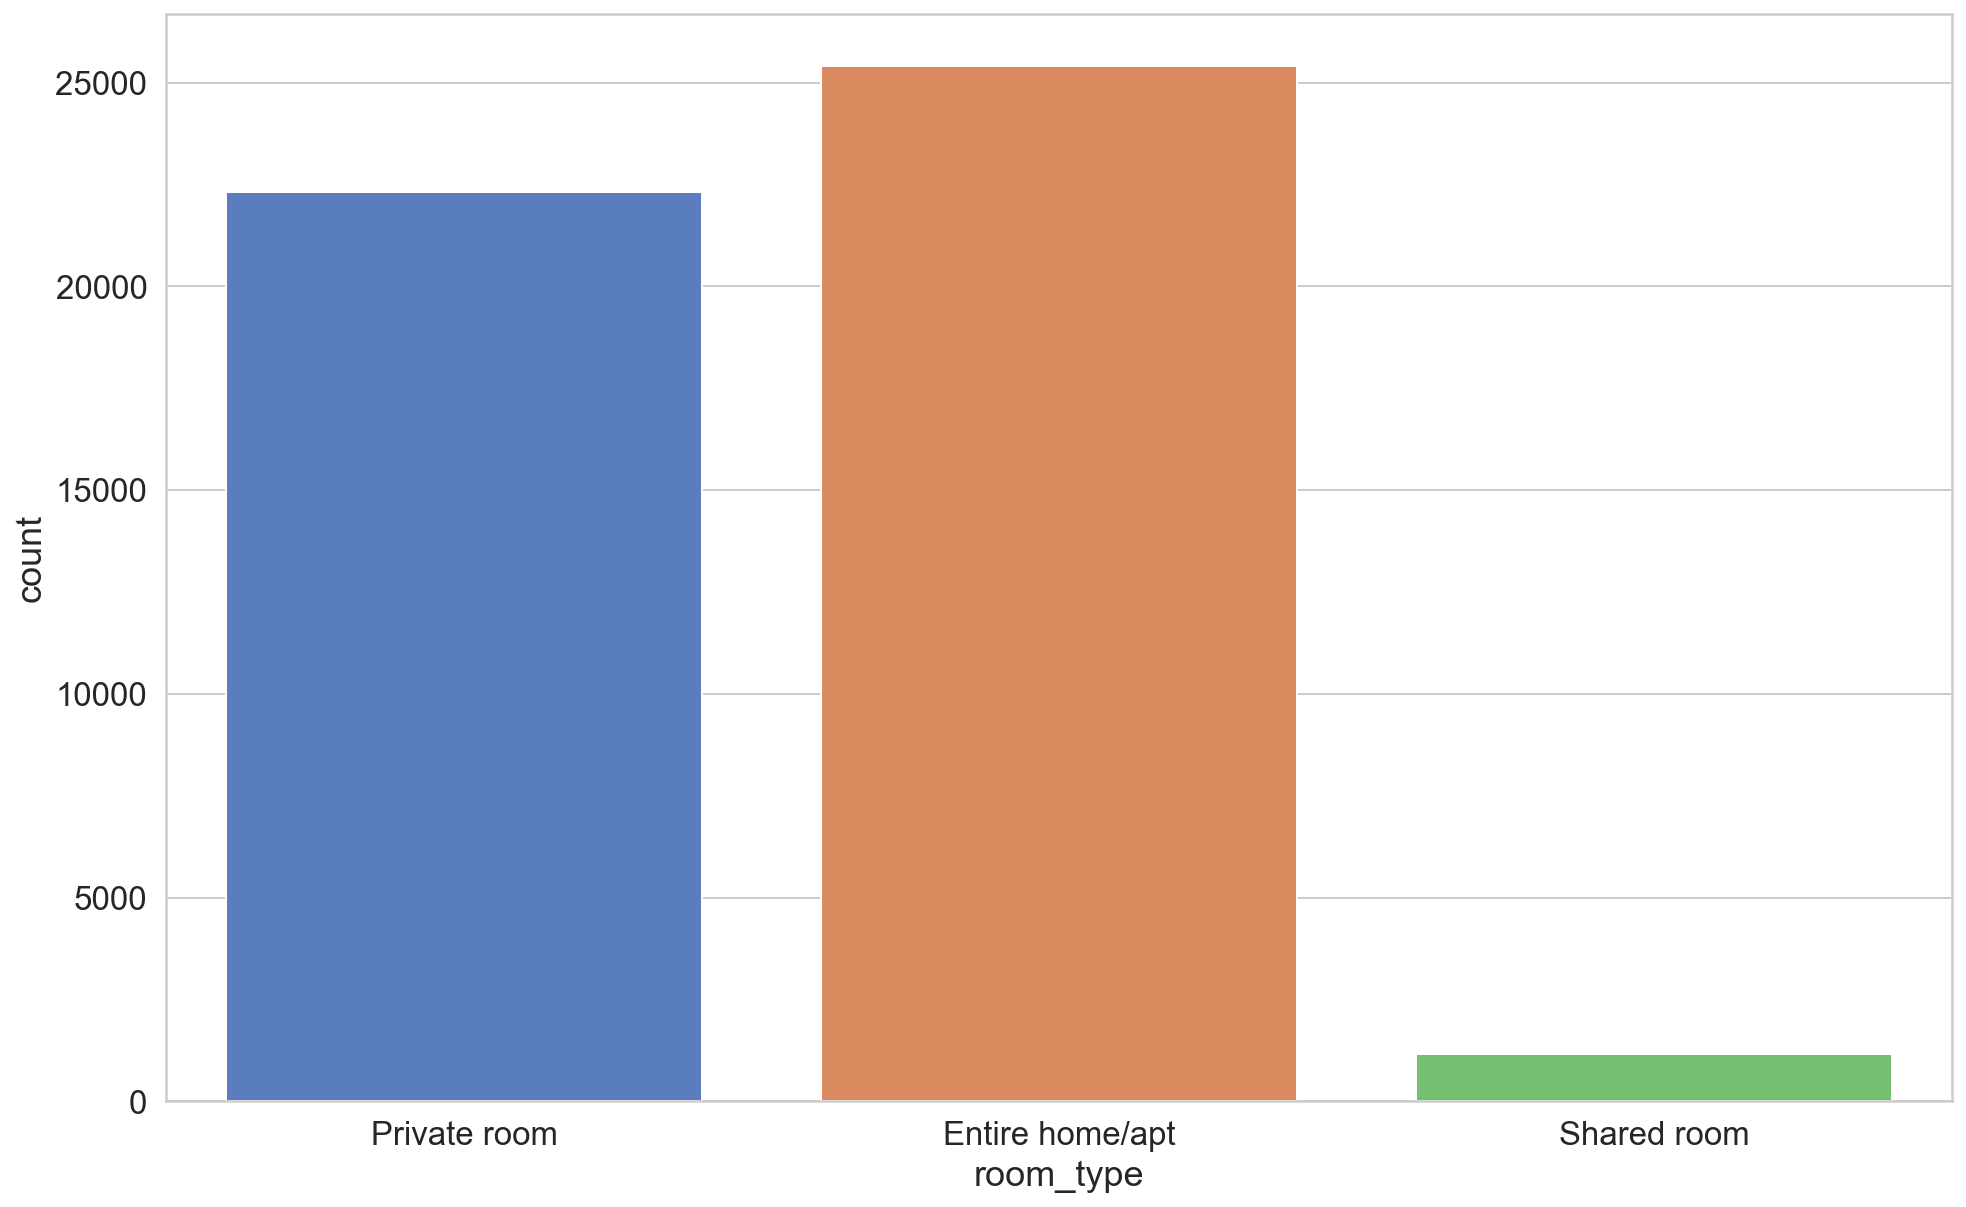

In [11]:
sns.countplot(x='room_type', data=df);

C:\Users\msi\AppData\Local\Temp\ipykernel_1456\1735526145.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.minimum_nights);


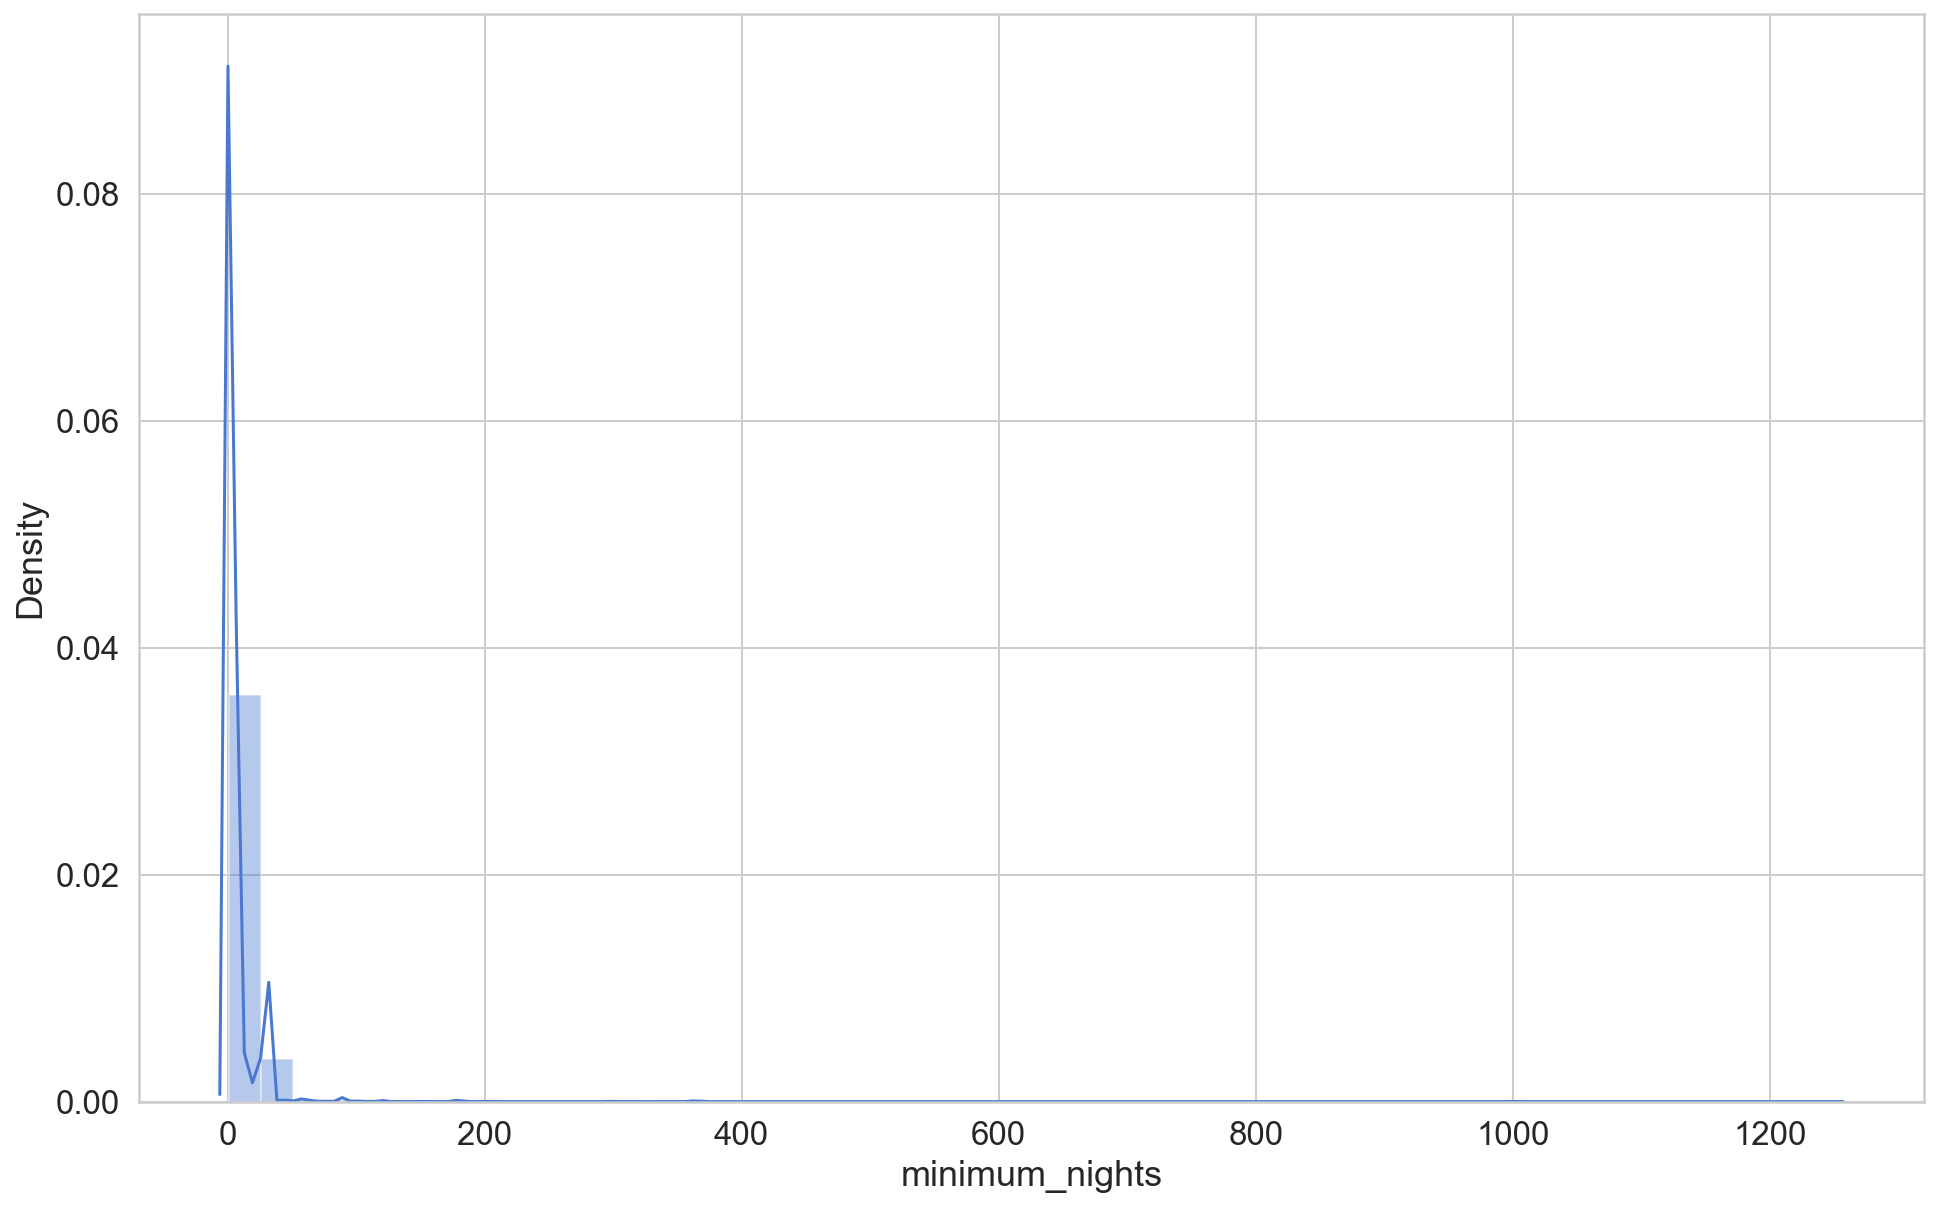

In [12]:
sns.distplot(df.minimum_nights);

C:\Users\msi\AppData\Local\Temp\ipykernel_1456\2185572018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.number_of_reviews);


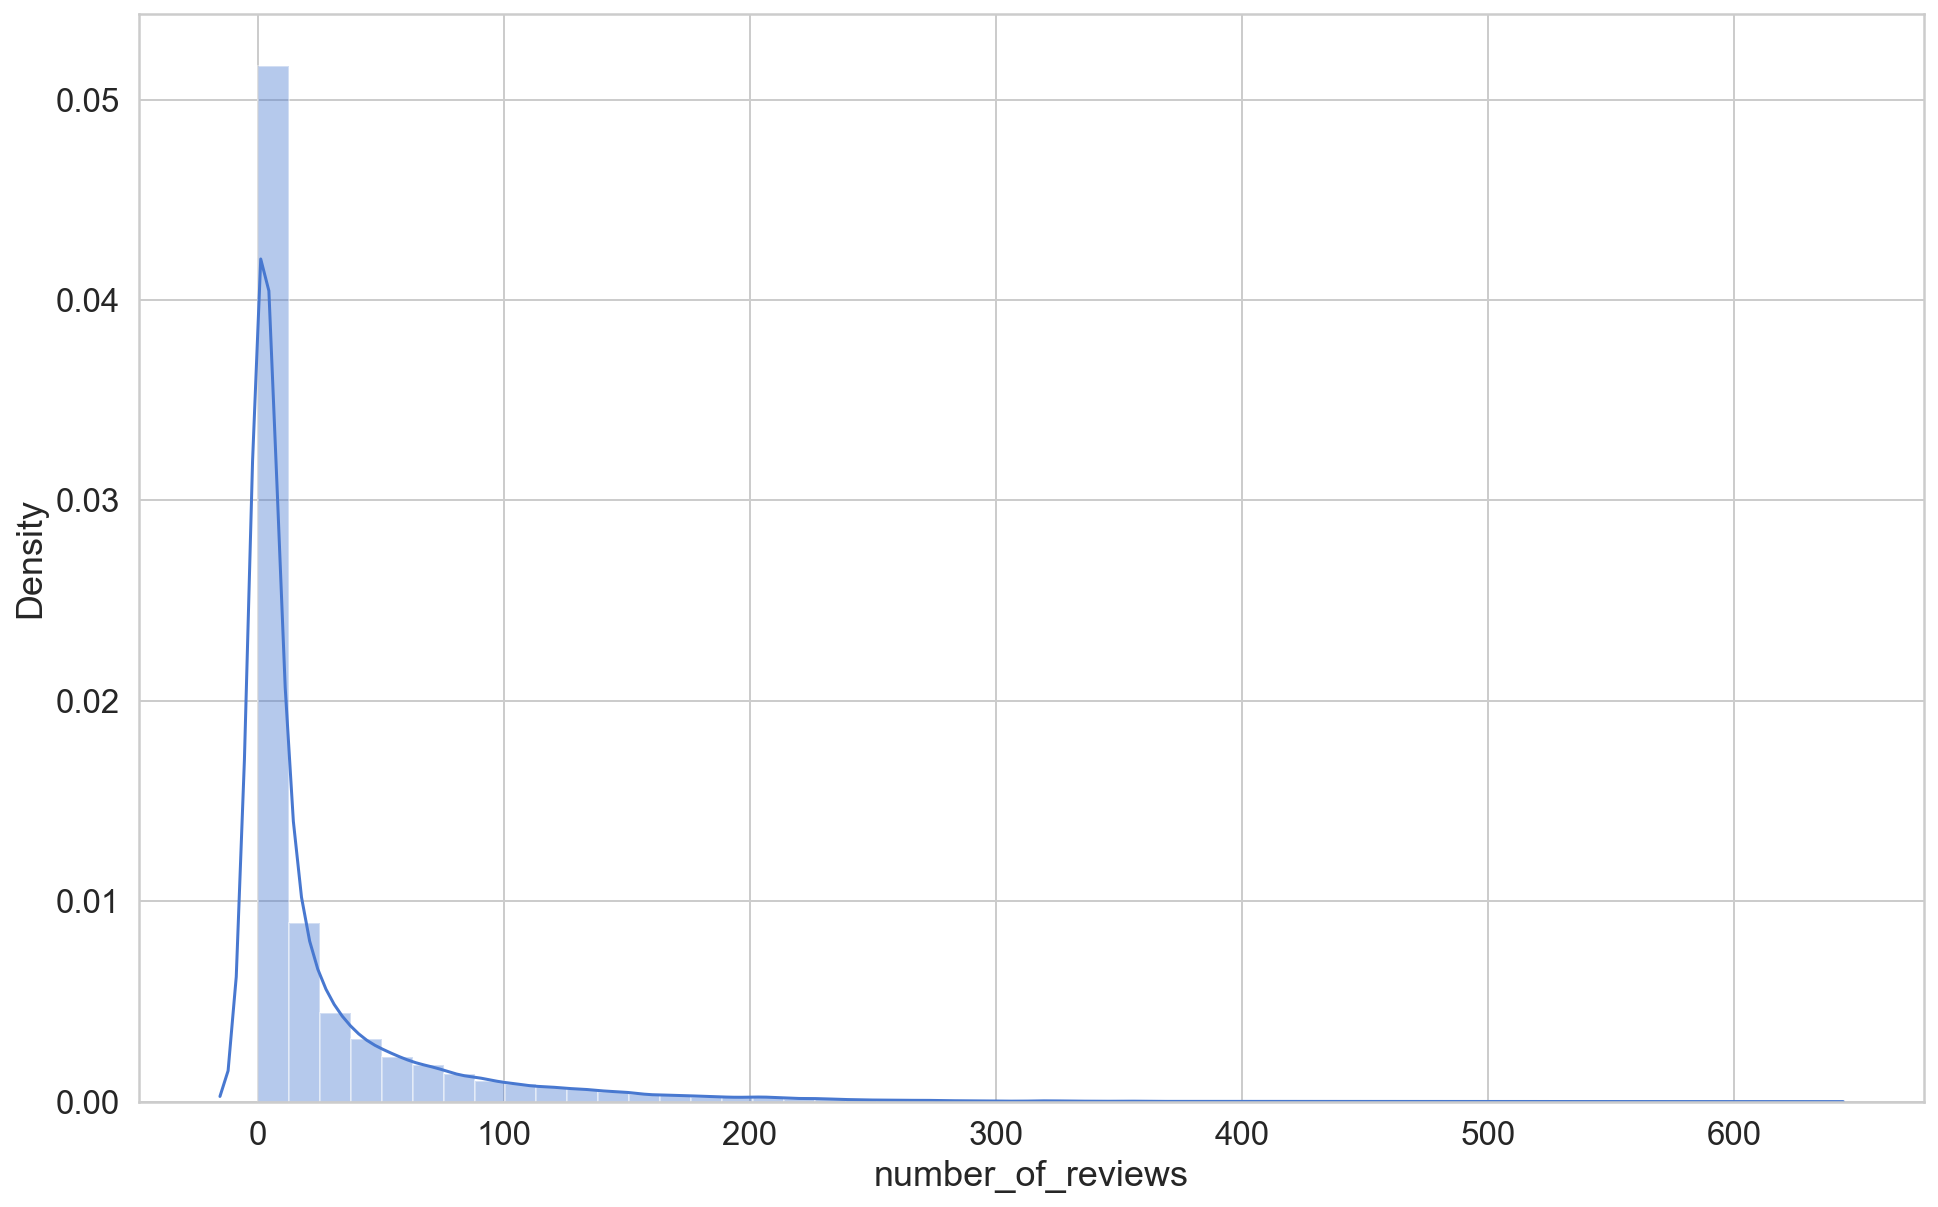

In [13]:
sns.distplot(df.number_of_reviews);

In [14]:
corr_matrix = df.corr()

In [15]:
price_corr = corr_matrix['price']
price_corr.iloc[price_corr.abs().argsort()]

id                                0.010619
host_id                           0.015309
reviews_per_month                -0.030608
latitude                          0.033939
minimum_nights                    0.042799
number_of_reviews                -0.047954
calculated_host_listings_count    0.057472
availability_365                  0.081829
longitude                        -0.150019
price                             1.000000
Name: price, dtype: float64

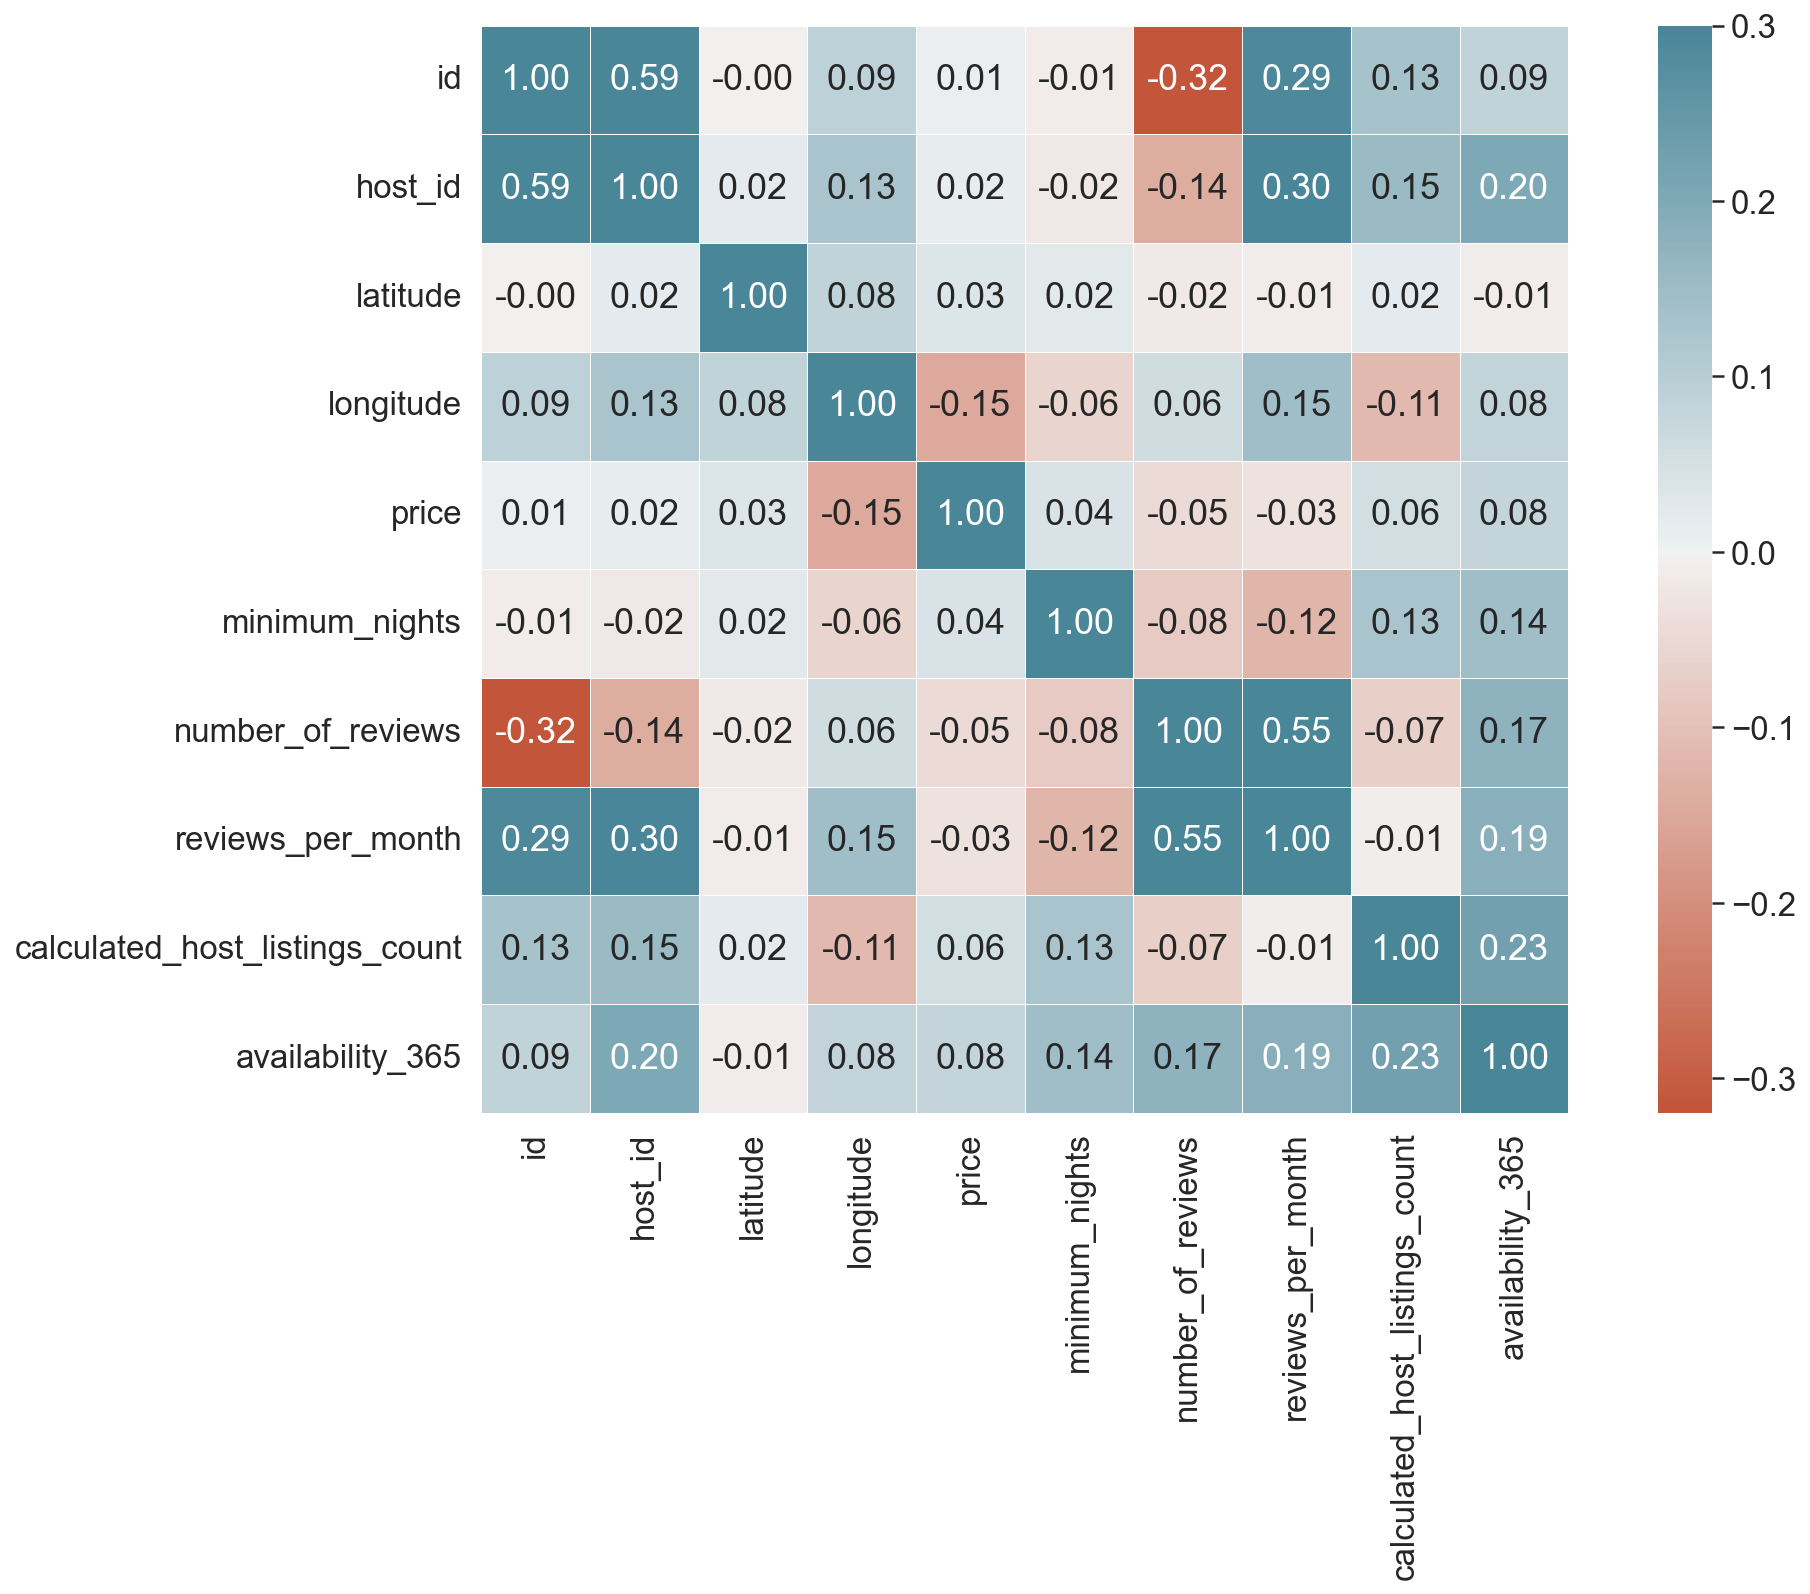

In [16]:
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5);

# Preprocessing




## Missing data?

In [17]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

last_review          10052
reviews_per_month    10052
host_name               21
name                    16
dtype: int64

## Remove unused columns!


In [18]:
df = df.drop(['id', 'name', 'host_id', 'host_name', 'reviews_per_month', 'last_review', 'neighbourhood'], axis=1)

In [19]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [20]:
df.columns

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [21]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


## Predict log1p

In [22]:
X = df.drop('price', axis=1)
y = np.log1p(df.price.values)

## Feature scaling and One-hot encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder

data = [['Manhattan'], ['Brooklyn']]

OneHotEncoder(sparse=False).fit_transform(data)

C:\Users\msi\anaconda3\envs\Shayekh_20230126\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1.],
       [1., 0.]])

In [24]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (MinMaxScaler(), ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']),
    (OneHotEncoder(handle_unknown="ignore"), ['neighbourhood_group', 'room_type'])
)

In [25]:
transformer.fit(X)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['latitude', 'longitude', 'minimum_nights',
                                  'number_of_reviews',
                                  'calculated_host_listings_count',
                                  'availability_365']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['neighbourhood_group', 'room_type'])])

In [26]:
X = transformer.transform(X)

## Split the training and test data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [28]:
X_train.shape

(39116, 14)

# Modeling

In [29]:
def plot_mse(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.plot(hist['epoch'], hist['mse'],
            label='Train MSE')
  plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val MSE')
  plt.legend()
  plt.show()

Epoch 1/100
978/978 [==============================] - 5s 2ms/step - loss: 8.7058 - mse: 8.7058 - val_loss: 0.5555 - val_mse: 0.5555
Epoch 2/100
978/978 [==============================] - 2s 2ms/step - loss: 2.3692 - mse: 2.3692 - val_loss: 0.4863 - val_mse: 0.4863
Epoch 3/100
978/978 [==============================] - 2s 2ms/step - loss: 2.0915 - mse: 2.0915 - val_loss: 0.4619 - val_mse: 0.4619
Epoch 4/100
978/978 [==============================] - 2s 2ms/step - loss: 2.0155 - mse: 2.0155 - val_loss: 0.4537 - val_mse: 0.4537
Epoch 5/100
978/978 [==============================] - 2s 2ms/step - loss: 1.9289 - mse: 1.9289 - val_loss: 0.4549 - val_mse: 0.4549
Epoch 6/100
978/978 [==============================] - 2s 2ms/step - loss: 1.8660 - mse: 1.8660 - val_loss: 0.4001 - val_mse: 0.4001
Epoch 7/100
978/978 [==============================] - 2s 2ms/step - loss: 1.7809 - mse: 1.7809 - val_loss: 0.4330 - val_mse: 0.4330
Epoch 8/100
978/978 [==============================] - 2s 2ms/step - 

978/978 [==============================] - 2s 2ms/step - loss: 0.3005 - mse: 0.3005 - val_loss: 0.2521 - val_mse: 0.2521
Epoch 63/100
978/978 [==============================] - 2s 2ms/step - loss: 0.2935 - mse: 0.2935 - val_loss: 0.2466 - val_mse: 0.2466
Epoch 64/100
978/978 [==============================] - 2s 2ms/step - loss: 0.2898 - mse: 0.2898 - val_loss: 0.2512 - val_mse: 0.2512
Epoch 65/100
978/978 [==============================] - 2s 2ms/step - loss: 0.2864 - mse: 0.2864 - val_loss: 0.2474 - val_mse: 0.2474
Epoch 66/100
978/978 [==============================] - 2s 2ms/step - loss: 0.2827 - mse: 0.2827 - val_loss: 0.2474 - val_mse: 0.2474
Epoch 67/100
978/978 [==============================] - 2s 2ms/step - loss: 0.2807 - mse: 0.2807 - val_loss: 0.2438 - val_mse: 0.2438
Epoch 68/100
978/978 [==============================] - 2s 2ms/step - loss: 0.2765 - mse: 0.2765 - val_loss: 0.2441 - val_mse: 0.2441
Epoch 69/100
978/978 [==============================] - 2s 2ms/step - loss:

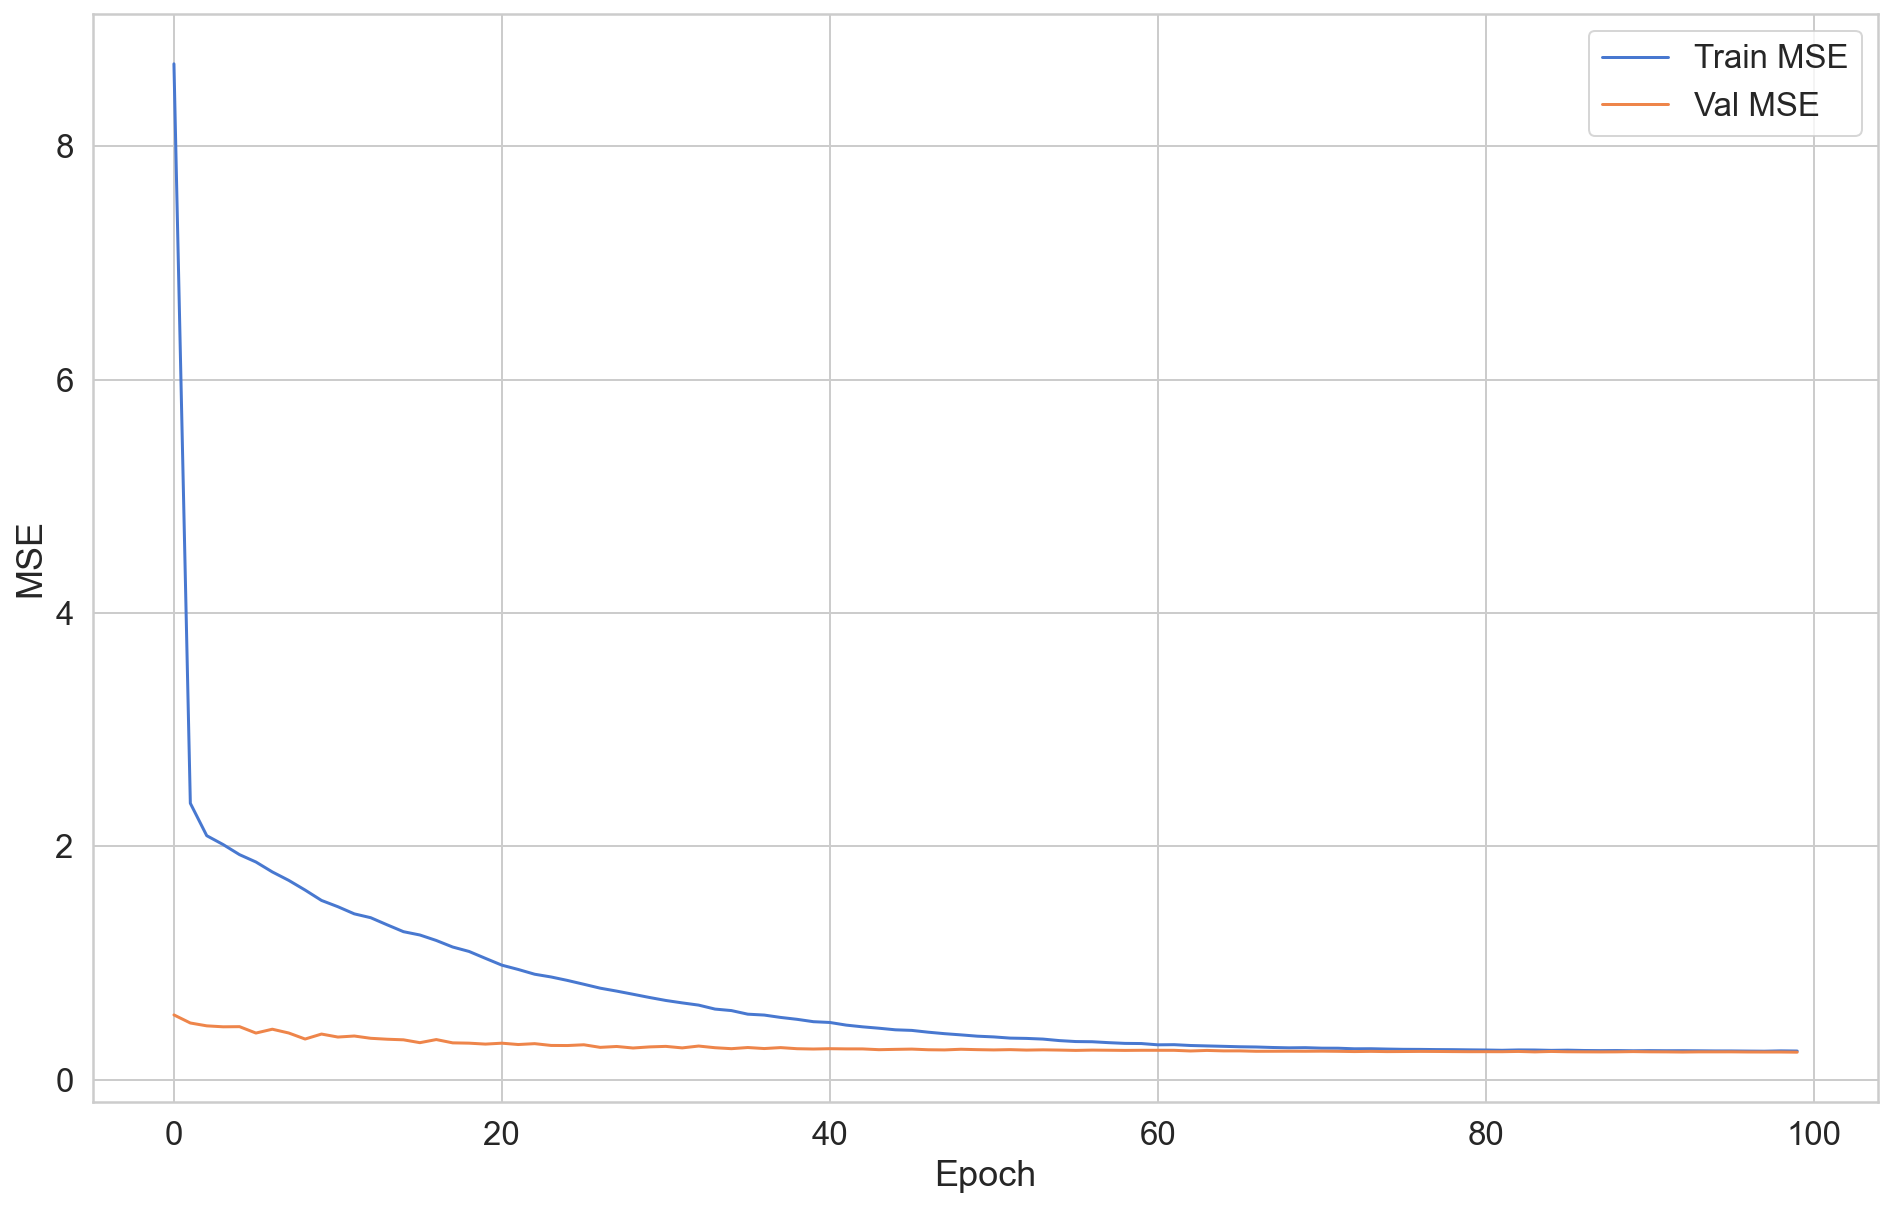

In [30]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=64, activation="relu", input_shape=[X_train.shape[1]]))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(1))

model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss = 'mse', 
    metrics = ['mse'])

BATCH_SIZE = 32

early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mse',
  mode="min",
  patience=10
)

history = model.fit(
  x=X_train,
  y=y_train,
  shuffle=True,
  epochs=100,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  callbacks=[early_stop]
)

plot_mse(history)

# Evaluation

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [32]:
y_pred = model.predict(X_test)

In [33]:
f'MSE {mean_squared_error(y_test, y_pred)}'

'MSE 0.21225668737147568'

In [34]:
f'MAE {mean_absolute_error(y_test, y_pred)}'

'MAE 0.3333422965879529'

In [35]:
f'RMSE {np.sqrt(mean_squared_error(y_test, y_pred))}'

'RMSE 0.4607132376777074'

In [36]:
f'R2 {r2_score(y_test, y_pred)}'

'R2 0.5513375275246015'

# Saving

In [37]:
joblib.dump(transformer, "data_transformer2.joblib")
model.save("price_prediction_model2.h5")

In [0]:
from google.colab import files

In [0]:
files.download("data_transformer.joblib")
files.download("price_prediction_model.h5") 